# 01 - EDA e Tratamento das Vendas

### Importação das bibliotecas utilizadas

In [1]:
import pandas as pd #manipulação de dataframes
import numpy as np #recursos matemáticos
import seaborn as sns #visualização de dados
import matplotlib.pyplot as plt #visualização de dados
import math

# Dataset - Vendas

In [4]:
vendas_df = pd.read_csv('/Users/micarloteixeira/Desktop/Data Science/Projects/Rossman Store/dataset/brutos/train.csv') #info sobre as vendas

/var/folders/9g/j7mrlvls3lg9dq5js6vpp3c40000gn/T/ipykernel_66256/1953951045.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  vendas_df = pd.read_csv('/Users/micarloteixeira/Desktop/Data Science/Projects/Rossman Store/dataset/brutos/train.csv') #info sobre as vendas


In [5]:
vendas_df.shape # 9 colunas/atributos e 1 milhão+ linhas/registros de vendas

(1017209, 9)

Dicionário de Variáveis

- **Store**: Identificador da loja  
- **DayOfWeek**: Dia da semana (1 = segunda-feira, ..., 7 = domingo)  
- **Date**: Data da venda  
- **Sales**: Vendas/dia (quantidade de euros vendidos)  
- **Customers**: Número de clientes no dia  
- **Open**: Indica se a loja estava aberta (1 = aberta, 0 = fechada)  
- **Promo**: Indica se havia uma promoção no dia específico de venda  
- **StateHoliday**: Indica se o dia era um feriado estadual (`0`, `a`, `b`, `c`)  
- **SchoolHoliday**: Indica se havia feriado escolar (1 = sim, 0 = não)  

In [6]:
vendas_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [7]:
vendas_df['DayOfWeek'].unique() #Indo da segunda-feira (1) até o domingo (7)

array([5, 4, 3, 2, 1, 7, 6])

In [8]:
vendas_df['StateHoliday'].unique() # feriado (a = feriado público, b = Páscoa, c = Natal, 0 = nenhum).

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [9]:
vendas_df.info() #Não há dados faltantes/nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [10]:
vendas_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


# EDA - Vendas

<Axes: >

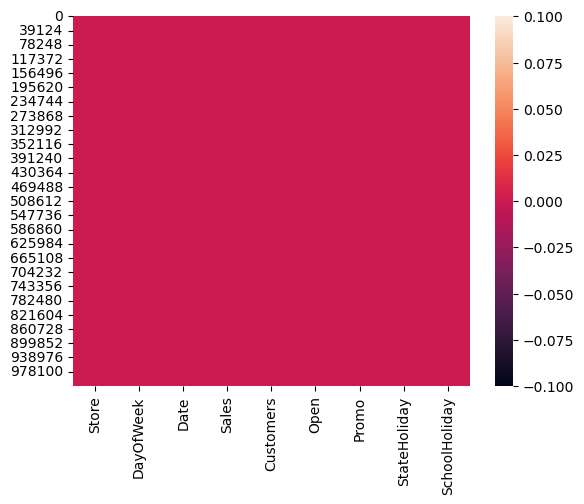

In [11]:
sns.heatmap(vendas_df.isnull()) #Indicando que não há dado faltante

In [12]:
vendas_df.isnull().sum() #Confirmando que não há dados faltantes no dataset de vendas. Logo não faremos nenhum pré-processamento aqui.

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

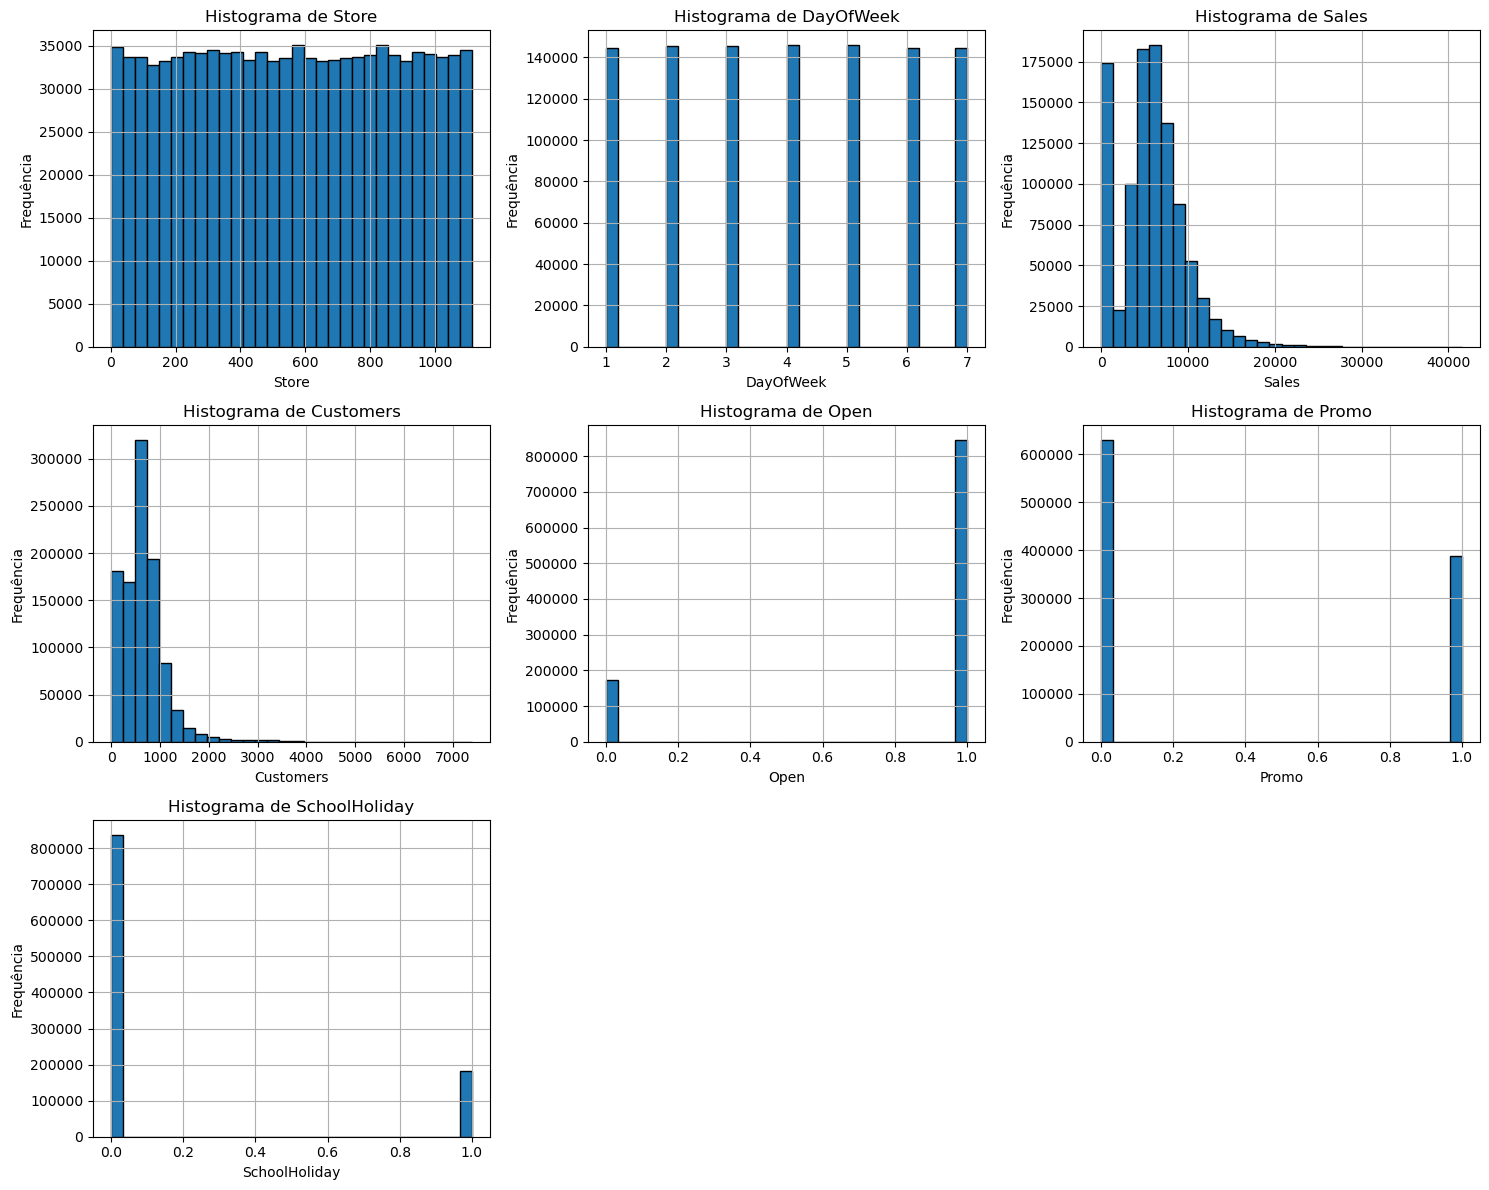

In [13]:
# Lista de colunas não numéricas a serem excluídas
colunas_nao_numericas = ['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'] # Serão removidas

# Criar uma cópia do dataframe sem as colunas não numéricas
vendas_df_numericas = vendas_df.drop(columns=colunas_nao_numericas, errors='ignore')

# Definir o número de colunas e linhas para a grade de subplots
n_cols = 3  # Número de colunas na grade (ajuste conforme necessário)
n_linhas = math.ceil(len(vendas_df_numericas.columns) / n_cols)  # Calcula o número de linhas necessário

# Criar a figura e a grade de subplots
fig, axes = plt.subplots(n_linhas, n_cols, figsize=(15, n_linhas * 4))

# Ajustar axes para ser iterável em todos os casos
if n_linhas > 1 or n_cols > 1:
    axes = axes.flatten()
else:
    axes = [axes]

# Iterar pelas colunas numéricas e plotar os histogramas
for i, column in enumerate(vendas_df_numericas.columns):
    vendas_df_numericas[column].hist(ax=axes[i], bins=30, edgecolor='black')
    axes[i].set_title(f'Histograma de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequência')

# Ocultar subplots vazios, se houver
for j in range(len(vendas_df_numericas.columns), len(axes)):
    fig.delaxes(axes[j])

# Otimizar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar a figura com todos os subplots
plt.show()

### Análise de cada histograma:

**Store:** Sugere que o conjunto de dados contém um número similar de registros (observações) para cada uma das lojas numeradas de 1 a 1115. Não há lojas com uma representação significativamente maior ou menor de dados em comparação com as outras.

**DayOfWeek:** A distribuição é relativamente uniforme entre os dias da semana. Cada dia da semana (de 1 a 7) possui uma frequência de ocorrência bastante similar, com aproximadamente 140.000 registros cada. Isso indica que os dados estão bem distribuídos ao longo dos dias da semana.

**Sales:** Exibe uma distribuição assimétrica positiva (à direita). A grande maioria das observações de vendas concentra-se em valores mais baixos, com uma cauda longa estendendo-se para valores de vendas mais altos. Há um pico significativo de vendas em torno de 0, o que pode indicar dias em que a loja estava fechada ou não houve vendas. A frequência diminui drasticamente à medida que o valor das vendas aumenta, indicando que vendas muito altas são raras.

**Customers:** Semelhante à distribuição de vendas, o número de clientes também apresenta uma distribuição assimétrica positiva. A maioria dos registros mostra um número menor de clientes, com a frequência diminuindo à medida que o número de clientes aumenta. Há também um pico próximo de zero clientes, o que pode estar correlacionado com os dias de vendas zero (loja fechada).

**Open:** Observa-se uma frequência muito maior para o valor 1 (loja aberta) em comparação com o valor 0 (loja fechada). Isso indica que a grande maioria dos registros no conjunto de dados corresponde a dias em que as lojas estavam abertas (Evidentemente).

**Promo:** Há uma frequência maior para o valor 0 (sem promoção) do que para o valor 1 (com promoção). Isso sugere que, no período coberto pelos dados, houve mais dias sem promoções do que com promoções, embora a diferença não seja tão drástica quanto na variável "Open". Aproximadamente, parece haver um pouco mais de 400.000 ocorrências de promoção e mais de 600.000 sem promoção.

**SchoolHoliday:** Mostra que a grande maioria dos registros corresponde a dias que não são feriados escolares (valor 0). A frequência de dias com feriado escolar (valor 1) é significativamente menor, em torno de 150.000, comparado a mais de 800.000 dias normais.

### Devemos considerar os dias em que as lojas estavam fechadas? Não. Portanto, aplicaremos um filtro no dataset de vendas para incluir apenas os dias em que as lojas estavam abertas.

In [14]:
closed_vendas_df = vendas_df[vendas_df['Open'] == 0]
open_vendas_df = vendas_df[vendas_df['Open'] == 1]

print('Total = ', len(vendas_df))
print('Número de lojas/dias fechado = ', len(closed_vendas_df))
print('Número de lojas/dias aberto = ', len(open_vendas_df))

# Calcular a proporção de dias/lojas fechados
proporcao_fechados = len(closed_vendas_df) / len(vendas_df)
print(f'Proporção de lojas/dias fechados: {proporcao_fechados:.4f}')

# Agrupar o dataframe de vendas fechadas pelo ID da loja e contar os registros
dias_fechados_por_loja = closed_vendas_df['Store'].value_counts().sort_index()

print("\nNúmero de dias fechados por loja:")
print(dias_fechados_por_loja)

# Calcular a média de dias fechados por loja
media_dias_fechados = dias_fechados_por_loja.mean()

print(f"\nMédia de dias fechados por loja: {media_dias_fechados:.2f}")

Total =  1017209
Número de lojas/dias fechado =  172817
Número de lojas/dias aberto =  844392
Proporção de lojas/dias fechados: 0.1699

Número de dias fechados por loja:
Store
1       161
2       158
3       163
4       158
5       163
       ... 
1111    163
1112    163
1113    158
1114    158
1115    161
Name: count, Length: 1105, dtype: int64

Média de dias fechados por loja: 156.40


Veja que em média, cada loja ficou fechada por 156 dias durante o período de 2013-01-01 a 2015-07-31.

Diante do exposto, serão considerados 844.382 registros de vendas, correspondentes apenas aos dias em que as lojas estavam em funcionamento.

In [15]:
vendas_df = vendas_df[vendas_df['Open'] == 1]
vendas_df.shape

(844392, 9)

Filtramos o dataset vendas_df para manter **apenas os registros em que as lojas estavam abertas**. Como, após esse filtro, o atributo Open possui valor 1 em todas as linhas, faz sentido removê-lo do conjunto de dados, pois ele deixou de trazer informações relevantes.

In [16]:
vendas_df.drop(['Open'], axis = 1, inplace=True)

In [17]:
vendas_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,0,1
1,2,5,2015-07-31,6064,625,1,0,1
2,3,5,2015-07-31,8314,821,1,0,1
3,4,5,2015-07-31,13995,1498,1,0,1
4,5,5,2015-07-31,4822,559,1,0,1


In [18]:
vendas_df.describe()

,Store,DayOfWeek,Sales,Customers,Promo,SchoolHoliday
count,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000,844392.000000
mean,558.422920,3.520361,6955.514291,762.728395,0.446352,0.193580
std,321.731914,1.723689,3104.214680,401.227674,0.497114,0.395103
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,280.000000,2.000000,4859.000000,519.000000,0.000000,0.000000
50%,558.000000,3.000000,6369.000000,676.000000,0.000000,0.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.000000,0.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.000000,1.000000


In [20]:
vendas_df.to_csv('/Users/micarloteixeira/Desktop/Data Science/Projects/Rossman Store/dataset/processados/vendasOK_df.csv', index=False)

## Estatísticas Descritivas: `vendas_df` Antes e Depois do Pré-processamento

Analisar as saídas do método `.describe()` para o dataset de vendas (`vendas_df`) antes e depois da etapa de pré-processamento (que incluiu a filtragem para manter apenas os dias em que as lojas estavam abertas e a remoção da coluna 'Open') nos permite entender o impacto dessa limpeza nos dados.

---

### 1. Contagem de Registros (`count`)

* **Antes do Pré-processamento:** Todas as colunas apresentavam 1.017.209 registros.
* **Depois do Pré-processamento:** Todas as colunas passaram a ter 844.392 registros.

>A redução de 172.817 registros reflete a remoção das entradas onde as lojas estavam fechadas (`Open == 0`). Isso confirma que o filtro foi aplicado corretamente.

---

### 2. Coluna `Store` (Identificador da Loja)

* **Estatísticas Principais (Média, Desvio Padrão, Mín, Quartis, Máx):**
    * **Antes:** Média ≈ 558.43, std ≈ 321.91, min 1, max 1115.
    * **Depois:** Média ≈ 558.42, std ≈ 321.73, min 1, max 1115.

>As estatísticas da coluna `Store` mantiveram-se praticamente estáveis, alterando-se apenas a contagem total. Isso é esperado, pois filtrar por lojas abertas não deve modificar a distribuição intrínseca dos identificadores das lojas.

---

### 3. Coluna `DayOfWeek` (Dia da Semana)

* **Média (`mean`):**
    * Antes: ≈ 3.998
    * Depois: ≈ 3.520
* **Desvio Padrão (`std`):**
    * Antes: ≈ 1.997
    * Depois: ≈ 1.724
* **Mediana (`50%`):**
    * Antes: 4.0
    * Depois: 3.0
* **75º Percentil (`75%`):**
    * Antes: 6.0
    * Depois: 5.0

> Observou-se uma diminuição na média e na mediana de `DayOfWeek`. Isso indica que dias com valores mais altos (como 6 para sábado e 7 para domingo) foram proporcionalmente mais removidos, o que é consistente com o fechamento de lojas aos domingos ou em outros dias específicos. A redução no desvio padrão aponta para uma menor variabilidade nos dias da semana em que as lojas estão operacionais.

---

### 4. Coluna `Sales` (Vendas)

* **Média (`mean`):**
    * Antes: ≈ 5773.82
    * Depois: ≈ 6955.51
* **Desvio Padrão (`std`):**
    * Antes: ≈ 3849.93
    * Depois: ≈ 3104.21
* **Mínimo (`min`):**
    * Antes: 0.0
    * Depois: 0.0
* **Quartis (25%, 50%, 75%):**
    * Todos os quartis aumentaram. A mediana (`50%`) passou de ≈ 5744 para ≈ 6369.

>Houve um aumento expressivo na média de vendas, resultado da remoção dos dias com vendas zero (lojas fechadas). O desvio padrão diminuiu com a exclusão desses valores zero. É importante notar que o valor mínimo de vendas permaneceu 0, mesmo para lojas abertas, sugerindo dias sem vendas registradas apesar da loja estar operacional. **Este é um ponto para investigação futura.**

---

### 5. Coluna `Customers` (Número de Clientes)

* **Média (`mean`):**
    * Antes: ≈ 633.15
    * Depois: ≈ 762.73
* **Desvio Padrão (`std`):**
    * Antes: ≈ 464.41
    * Depois: ≈ 401.23
* **Mínimo (`min`):**
    * Antes: 0.0
    * Depois: 0.0
* **Quartis (25%, 50%, 75%):**
    * Todos os quartis aumentaram. A mediana (`50%`) passou de ≈ 609 para ≈ 676.

>Assim como em `Sales`, a média de clientes subiu e o desvio padrão caiu após a remoção dos dias de loja fechada. O valor mínimo de clientes também se manteve em 0, indicando dias com lojas abertas mas sem clientes registrados, **o que também merece atenção.**

---

### 6. Coluna `Open` (Loja Aberta/Fechada)

* **Antes do Pré-processamento:**
    * Média: ≈ 0.83 (indicando que ~83% dos registros eram de lojas abertas).
    * Mínimo: 0, Máximo: 1.
    * Quartis (25%, 50%, 75%): Todos 1.
* **Depois do Pré-processamento:**
    * A coluna foi removida, pois, após o filtro, todos os seus valores seriam 1.

> A média anterior de ≈0.83 é consistente com a proporção de dias abertos (844.392) em relação ao total (1.017.209), que é de aproximadamente 83,01%.

---

### 7. Coluna `Promo` (Indica se havia promoção)

* **Média (`mean` - proporção de dias com promoção):**
    * Antes: ≈ 0.382 (ou ~0.393 pela análise de histograma).
    * Depois: ≈ 0.446.

> A proporção de dias com promoção (`mean` da variável binária) aumentou após a filtragem. Isso sugere que as promoções ocorrem com maior frequência em dias em que as lojas estão efetivamente abertas, ou que os dias de fechamento raramente coincidem com dias de promoção.

---

### 8. Coluna `SchoolHoliday` (Indica se havia feriado escolar)

* **Média (`mean` - proporção de dias com feriado escolar):**
    * Antes: ≈ 0.173 (ou ~0.147 pela análise de histograma).
    * Depois: ≈ 0.190.

> Observou-se um leve aumento na proporção de feriados escolares entre os dias de lojas abertas. Isso pode indicar uma tendência das lojas permanecerem abertas durante feriados escolares ou que os dias de fechamento não coincidem fortemente com esses feriados. A 75ª percentil permaneceu 0 em ambos os cenários, mostrando que menos de 25% dos dias (totais ou apenas de lojas abertas) são feriados escolares.

---

### Resumo das Diferenças

O pré-processamento ao remover os dias de lojas fechadas resultou em:
* Uma visão mais precisa e realista das médias de `Sales` e `Customers` nos dias de operação.
* Redução da variabilidade nos dados de `Sales` e `Customers` que era causada pelos valores zero dos dias de fechamento.
* Indicação de que os fechamentos de lojas não se distribuem uniformemente pela semana.
* Maior prevalência de promoções (`Promo`) quando se consideram apenas os dias em que as lojas estão funcionando.
* **Um ponto crítico para análise futura: a ocorrência de vendas e clientes nulos mesmo em dias em que as lojas estão registradas como abertas.**


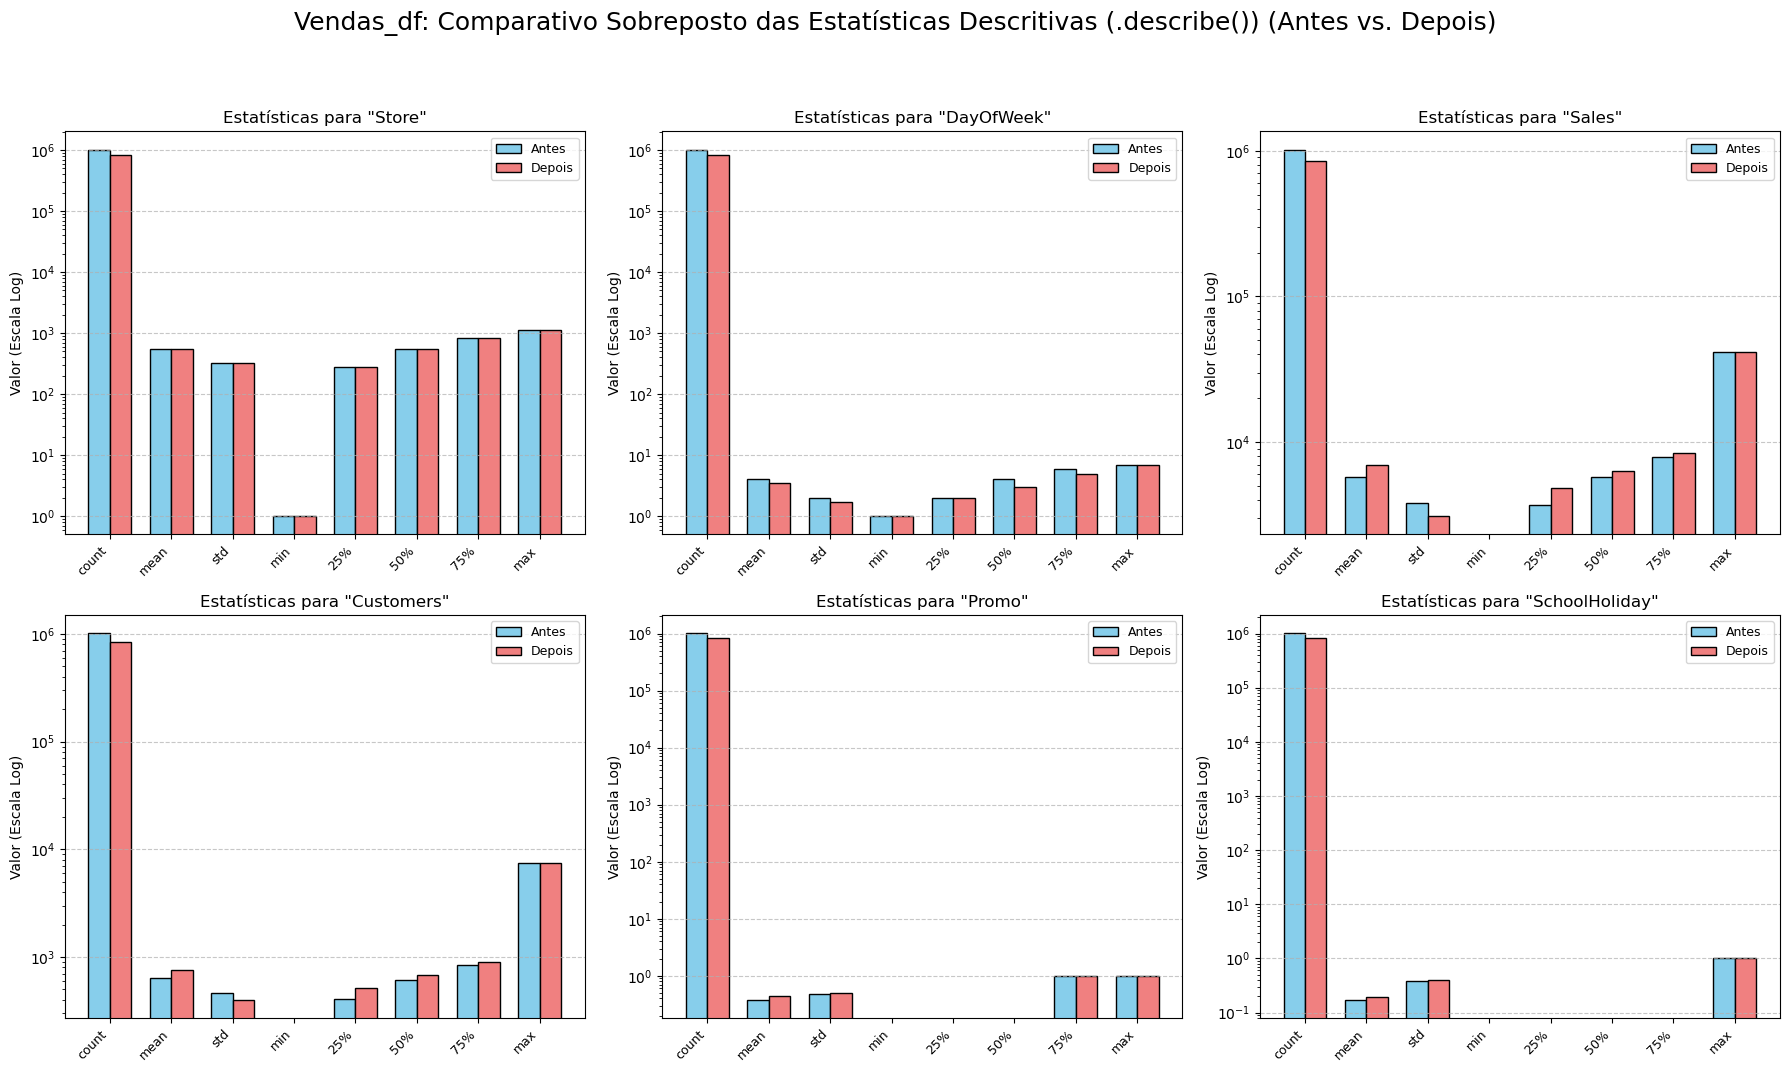

In [21]:
# Dados do describe() ANTES e DEPOIS do pré-processamento
data_before_dict = {
    'Store': {'count': 1017209, 'mean': 558.4297, 'std': 321.9087, 'min': 1, '25%': 280, '50%': 558, '75%': 838, 'max': 1115},
    'DayOfWeek': {'count': 1017209, 'mean': 3.998341, 'std': 1.997391, 'min': 1, '25%': 2, '50%': 4, '75%': 6, 'max': 7},
    'Sales': {'count': 1017209, 'mean': 5773.819, 'std': 3849.926, 'min': 0, '25%': 3727, '50%': 5744, '75%': 7856, 'max': 41551},
    'Customers': {'count': 1017209, 'mean': 633.1459, 'std': 464.4117, 'min': 0, '25%': 405, '50%': 609, '75%': 837, 'max': 7388},
    'Promo': {'count': 1017209, 'mean': 0.381515, 'std': 0.485759, 'min': 0, '25%': 0, '50%': 0, '75%': 1, 'max': 1},
    'SchoolHoliday': {'count': 1017209, 'mean': 0.172931, 'std': 0.378197, 'min': 0, '25%': 0, '50%': 0, '75%': 0, 'max': 1}
}

data_after_dict = {
    'Store': {'count': 844392, 'mean': 558.422920, 'std': 321.731914, 'min': 1, '25%': 280, '50%': 558, '75%': 837, 'max': 1115},
    'DayOfWeek': {'count': 844392, 'mean': 3.520361, 'std': 1.723689, 'min': 1, '25%': 2, '50%': 3, '75%': 5, 'max': 7},
    'Sales': {'count': 844392, 'mean': 6955.514291, 'std': 3104.214680, 'min': 0, '25%': 4859, '50%': 6369, '75%': 8360, 'max': 41551},
    'Customers': {'count': 844392, 'mean': 762.728395, 'std': 401.227674, 'min': 0, '25%': 519, '50%': 676, '75%': 893, 'max': 7388},
    'Promo': {'count': 844392, 'mean': 0.446352, 'std': 0.497114, 'min': 0, '25%': 0, '50%': 0, '75%': 1, 'max': 1},
    'SchoolHoliday': {'count': 844392, 'mean': 0.190162, 'std': 0.392429, 'min': 0, '25%': 0, '50%': 0, '75%': 0, 'max': 1}
}

# Criar DataFrames
desc_before_df = pd.DataFrame(data_before_dict)
desc_after_df = pd.DataFrame(data_after_dict)

# Configuração do plot
columns = desc_before_df.columns.tolist()
stats = desc_before_df.index.tolist()
ncols = 3
nrows = int(np.ceil(len(columns) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 5.5))
axes = axes.flatten()

# Configuração das barras
bar_width = 0.35
x_pos = np.arange(len(stats))

# Plotar cada coluna
for i, col in enumerate(columns):
    ax = axes[i]

    # Obter valores antes e depois
    val_before = desc_before_df[col]
    val_after = desc_after_df.get(col, pd.Series(np.nan, index=stats))

    # Plotar barras
    ax.bar(x_pos - bar_width/2, val_before, bar_width, label='Antes', color='skyblue', edgecolor='black')
    ax.bar(x_pos + bar_width/2, val_after, bar_width, label='Depois', color='lightcoral', edgecolor='black')

    # Configurar rótulos e aparência
    ax.set_title(f'Estatísticas para "{col}"', fontsize=12)
    ax.set_ylabel('Valor', fontsize=10)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(stats, rotation=45, ha="right", fontsize=9)
    ax.legend(fontsize=9)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Verificar necessidade de escala logarítmica
    combined = pd.concat([val_before, val_after]).dropna()
    if not combined.empty:
        non_count = combined.drop('count', errors='ignore').abs()
        max_non_count = np.nan_to_num(non_count.max())

        has_count = 'count' in combined.index
        count_val = 0.0
        if has_count:
            counts = combined.loc['count']
            count_val = np.nan_to_num(counts.max() if isinstance(counts, pd.Series) else counts)

        min_val = np.nan_to_num(combined.abs().min())

        # Decidir sobre escala logarítmica
        use_log = (has_count and (max_non_count == 0 and count_val > 0 or
                                 max_non_count > 0 and count_val > max_non_count * 10)) or \
                  (max_non_count > 1000 and min_val >= 0)

        if use_log:
            ax.set_yscale('log')
            ax.set_ylabel('Valor (Escala Log)', fontsize=10)

# Remover eixos não utilizados
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Configurar título e layout
fig.suptitle('Vendas_df: Comparativo Sobreposto das Estatísticas Descritivas (.describe()) (Antes vs. Depois)', fontsize=18, y=1.0)
plt.tight_layout(rect=[0, 0.03, 1, 0.96])

## Análise do Gráfico Comparativo das Estatísticas de `vendas_df` (Antes vs. Depois do Pré-processamento)


---

### 1. Estatísticas para `"Store"`
* **`count`**: Observa-se uma redução significativa na contagem de "Antes" (aprox. 1.017.20) para "Depois" (aprox. 844.392).
    * **Implicação**: Esta diminuição corresponde à remoção dos 172.817 dias de vendas em que as lojas estavam fechadas.
* **`mean`, `std`, `min`, `25%`, `50%`, `75%`, `max`**: Os valores para estas estatísticas permanecem praticamente idênticos entre "Antes" e "Depois".
    * **Implicação**: A filtragem não alterou a distribuição dos IDs das lojas em si, apenas o número de registros de vendas diárias associados a elas.

---

### 2. Estatísticas para `"DayOfWeek"`
* **`count`**: Reduziu de "Antes" para "Depois", como esperado.
* **`mean`**: Diminuiu de aproximadamente 4.0 (Antes) para cerca de 3.5 (Depois).
* **`std`**: Apresentou uma leve redução, de ~2.0 (Antes) para ~1.7 (Depois).
* **`50%` (Mediana)**: Caiu de 4 (Antes) para 3 (Depois).
* **`75%`**: Diminuiu de 6 (Antes) para 5 (Depois).
* **`min` e `max`**: Mantiveram-se em 1 e 7, respectivamente.
    * **Implicação**: A redução na média, mediana e 75º percentil sugere que dias com valores mais altos de `DayOfWeek` (como o domingo, dia 7, quando muitas lojas fecham) foram desproporcionalmente removidos. O dataset filtrado ("Depois") tem, portanto, uma concentração maior nos primeiros dias da semana.

---

### 3. Estatísticas para `"Sales"`
* **`count`**: Reduziu.
* **`mean`**: Aumentou de forma expressiva, de ~5774 (Antes) para ~6956 (Depois).
* **`std`**: Diminuiu de ~3850 (Antes) para ~3104 (Depois).
* **`min`**: Permaneceu `0` em ambos os cenários ("Antes" e "Depois").
* **`25%`, `50%` (Mediana), `75%`**: Todos estes quartis tiveram um aumento considerável.
    * **Implicação**: A remoção dos dias com `Sales == 0` (lojas fechadas) elevou significativamente a média de vendas e os valores centrais da distribuição nos dias operacionais. A variância diminuiu com a remoção desses zeros. O fato de o `min` continuar `0` após o filtro é um ponto crucial, indicando que mesmo lojas abertas podem ter vendas nulas, como você já observou para investigação futura.

---

### 4. Estatísticas para `"Customers"`
* **`count`**: Reduziu.
* **`mean`**: Aumentou substancialmente, de ~633 (Antes) para ~763 (Depois).
* **`std`**: Diminuiu de ~464 (Antes) para ~401 (Depois).
* **`min`**: Permaneceu `0` em ambos os casos.
* **`25%`, `50%` (Mediana), `75%`**: Todos estes quartis aumentaram.
    * **Implicação**: De forma similar a `Sales`, a exclusão dos dias de loja fechada (com `Customers == 0`) aumentou a média de clientes e os valores centrais. A variabilidade dos dados também foi reduzida. O `min` permanecendo `0` sugere que lojas abertas podem, ocasionalmente, não registrar clientes.

---

### 5. Estatísticas para `"Open"`
* **`count` (Antes)**: Mostra a contagem original total (1.017.209).
* **Barras "Depois"**: Para todas as estatísticas, as barras "Depois" estão zeradas ou ausentes no gráfico.
* **`mean` (Antes)**: Era aproximadamente 0.83, indicando que cerca de 83% dos registros originais correspondiam a dias de lojas abertas.
* **Outras estatísticas (Antes)**: Refletiam a natureza binária (0 ou 1) da coluna.
    * **Implicação**: A coluna `Open` foi removida do dataset após a filtragem, pois todos os registros restantes teriam `Open == 1`. Consequentemente, não há estatísticas "Depois" para esta coluna, o que é corretamente visualizado no gráfico.

---

### 6. Estatísticas para `"Promo"`
* **`count`**: Reduziu.
* **`mean`**: Aumentou de ~0.382 (Antes) para ~0.446 (Depois).
* **`std`**: Apresentou uma pequena alteração, esperada para variáveis binárias quando a proporção de ocorrências muda.
* **Mediana (`50%`)**: Permaneceu `0`, indicando que menos da metade dos dias (mesmo considerando apenas os dias abertos) tiveram promoção.
    * **Implicação**: A proporção de dias com promoção (`mean`) é maior no conjunto de dados "Depois" (lojas abertas). Isso indica que as promoções eram mais frequentes ou mais prováveis de ocorrer em dias em que as lojas estavam efetivamente operando.

---

### 7. Estatísticas para `"SchoolHoliday"`
* **`count`**: Reduziu.
* **`mean`**: Teve um leve aumento, de ~0.173 (Antes) para ~0.190 (Depois) (os valores exatos podem variar ligeiramente dependendo da fonte exata dos números no describe do PDF, mas a tendência é um leve aumento).
* **`std`**: Alterou-se minimamente.
* **75º Percentil**: Permaneceu `0` em ambos os cenários.
    * **Implicação**: Menos de 25% dos dias eram feriados escolares, tanto no dataset original quanto no filtrado. O leve aumento na média após o filtro sugere que os dias de fechamento não coincidiam fortemente com os feriados escolares ou que as lojas tendiam a permanecer abertas durante esses feriados.

---